In [5]:
import networkx as nx
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import wikipediaapi as wp
import re
import gacomm as gacomm
Lesmis = nx.read_gml("lesmis.gml")

### Content

- About the graph (text)
- Graph plain 

- Communities colored graph
- Character info (clickable on the node, displayed on the left)

- Degree distribution
- Degree centrality

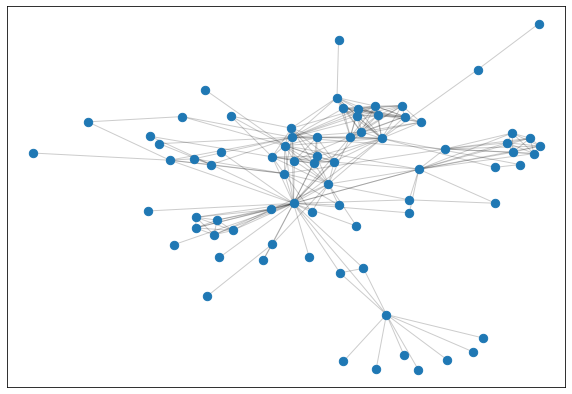

In [6]:
fig, axis = plt.subplots(nrows=1, ncols=1,figsize=(10, 7))
pos=nx.spring_layout(Lesmis)
es = nx.draw_networkx_edges(Lesmis, pos, alpha=0.2, ax=axis)
ns = nx.draw_networkx_nodes(Lesmis, pos, node_size=70, ax=axis)

In [7]:
df = pd.DataFrame(data={"character":list(Lesmis.nodes())})
df["degree"] = df.apply(lambda x: [x[1] for x in Lesmis.degree()])

In [8]:
wiki_en = wp.Wikipedia(language='en',
        extract_format=wp.ExtractFormat.HTML)
wiki_page = wiki_en.page("List of Les Misérables characters")
txt = wiki_page.text
lis = re.findall("<li>(.*?)</li>", txt)
char_info = [re.split("</b>",l.replace("<b>","")) for l in lis]
from unidecode import unidecode
char_info = [[unidecode(t[0].replace("(", "").replace(")", "").replace("-", "")),t[1].replace("– ","")] for t in char_info]

charss = []
charss = char_info.copy()

patron = charss[-4].copy()
child = charss[-1].copy()
charss += [child]
charss += [patron.copy() for r in range(3)]


left = ['Mlle Baptistine Myriel',
         'Magloire, Madame',
         'Blachevelle',
         'Azelma',
         'Mother Innocente',
         'Mademoiselle Gillenormand',
         'Colonel Georges Pontmercy',
         'Lesgle',
         'Bougon, Madame',
         'PatronMinette',
         'PatronMinette',
         'PatronMinette',
         'PatronMinette',
         'Two little boys',
         'Two little boys']
pair_of_left = ["MlleBaptistine","MmeMagloire",
                'Blacheville',"Anzelma",'MotherInnocent',
                'MlleGillenormand',
                "Pontmercy","Bossuet","MmeBurgon","Gueulemer",'Babet','Claquesous','Montparnasse',"Child1","Child2"]

for i in range(len(charss)):
    for j in range(len(left)):
        if charss[i][0] == left[j]:
            charss[i][0]= pair_of_left[j]
            left[j]="xx"
#             print(charss[i][0],left[j],pair_of_left[j])
            break
# charss

In [9]:
def get_info(name,chars):
    for c in chars:
        if re.search(name,c[0],re.IGNORECASE):
            chars.remove(c)
            return c[1]
            break
df["info"] = df["character"].apply(lambda x: get_info(x,charss))

In [10]:
subsets = gacomm.community_detection(Lesmis.nodes(),Lesmis.edges())

In [11]:
def find_group(name,subsets):
    for i in range(len(subsets)):
        if name in subsets[i]:
            return i
            break
    
df["group"] = df["character"].apply(lambda x: find_group(x,subsets))

In [12]:
len(subsets)

12

### Degree distribution, Degree Centrality

<AxesSubplot:xlabel='degree'>

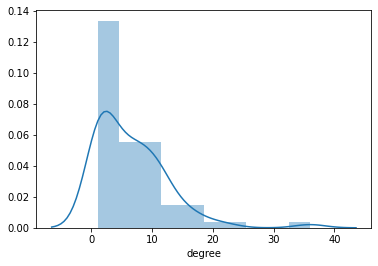

In [13]:
sn.distplot(df["degree"])

### Centralities

In [14]:
eigenvector_centrality = nx.eigenvector_centrality(Lesmis)

In [15]:
df["eig_centrality"]=df["character"].apply(lambda character: eigenvector_centrality[character])

In [16]:
betweenness_centrality = nx.betweenness_centrality(Lesmis)

In [17]:
df["betweenness_centrality"]=df["character"].apply(lambda character: betweenness_centrality[character])

In [18]:
closeness_centrality=nx.closeness_centrality(Lesmis)

In [19]:
df["closeness_centrality"]=df["character"].apply(lambda character: closeness_centrality[character])

### Shortest Path

In [20]:
shortest_path_length=nx.all_pairs_shortest_path_length(Lesmis)
highest = 0
for i in range(77):
    paths = next(shortest_path_length)[1]
    for key in paths:
        if paths[key] > highest:
            highest=paths[key]
            


In [21]:
shortest_path_length=nx.all_pairs_shortest_path_length(Lesmis)
longest_shortest_path=[]

In [22]:
for i in range(77):
    paths=next(shortest_path_length)
    for key in paths[1]:
        if paths[1][key]==highest:
            longest_shortest_path.append([paths[0],key])
            break
#     else:
#         continue  
#     break

In [23]:
longest_shortest_path

[['Napoleon', 'Jondrette'],
 ['CountessDeLo', 'Jondrette'],
 ['Geborand', 'Jondrette'],
 ['Champtercier', 'Jondrette'],
 ['Cravatte', 'Jondrette'],
 ['Count', 'Jondrette'],
 ['OldMan', 'Jondrette'],
 ['Listolier', 'Jondrette'],
 ['Fameuil', 'Jondrette'],
 ['Blacheville', 'Jondrette'],
 ['Favourite', 'Jondrette'],
 ['Dahlia', 'Jondrette'],
 ['Zephine', 'Jondrette'],
 ['Perpetue', 'Jondrette'],
 ['Gribier', 'Jondrette'],
 ['Jondrette', 'Napoleon'],
 ['Magnon', 'Jondrette'],
 ['MmePontmercy', 'Jondrette'],
 ['MlleVaubois', 'Jondrette'],
 ['MotherPlutarch', 'Perpetue']]

In [24]:
shortest_path = nx.shortest_path(Lesmis)

In [25]:
list_longest_shortest_path = []
for key in shortest_path:
    for k in shortest_path[key]:
        if key == longest_shortest_path[0][0] and k == longest_shortest_path[0][1]:
            list_longest_shortest_path = shortest_path[key][k]
            break
    else:
        continue
    break

In [26]:
shortest_path_edges = []
for i in range(len(list_longest_shortest_path)-1):
    shortest_path_edges.append([list_longest_shortest_path[i],list_longest_shortest_path[i+1]])

In [27]:
shortest_path_edges

[['Napoleon', 'Myriel'],
 ['Myriel', 'Valjean'],
 ['Valjean', 'Gavroche'],
 ['Gavroche', 'MmeBurgon'],
 ['MmeBurgon', 'Jondrette']]

### Spanning tree

In [28]:
from networkx.algorithms import tree
mst = tree.minimum_spanning_edges(Lesmis, algorithm='prim', data=False)
tree_edgelist = list(mst)

### Plot Summary

In [29]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup

url = 'https://www.sparknotes.com/lit/lesmis/summary/'
response = requests.get(url)
soup = BeautifulSoup(response.text)
soup_text = soup.prettify()

plot = re.findall("<p>\n\s+[\S\n\s]+[.]\n\s+</p>", soup_text)
plot_summary=plot[0].replace("\n", " ").replace("       ","").replace("      ","").replace("<p>","").split("</p>")

# Drawing

In [30]:
d_2 = {
        "shortest_path_nodes":list_longest_shortest_path,
        "shortest_path":shortest_path_edges,
        "plot_summary":plot_summary,
        "spanning_tree":tree_edgelist
      }

In [31]:
d_2["description"] = {
    "degree_centrality":"The number of links incident upon a node",
    "eigen_centrality":"Eigenvector centrality (also called eigencentrality) is a measure of the influence of a node in a network. It assigns relative scores to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes.",
    "betweenness_centrality":"Betweenness is a centrality measure of a vertex within a graph (there is also edge betweenness, which is not discussed here). Betweenness centrality quantifies the number of times a node acts as a bridge along the shortest path between two other nodes. It was introduced as a measure for quantifying the control of a human on the communication between other humans in a social network by Linton Freeman. In his conception, vertices that have a high probability to occur on a randomly chosen shortest path between two randomly chosen vertices have a high betweenness.",
    "closeness_centrality":"The average length of the shortest path between the node and all other nodes in the graph. Thus the more central a node is, the closer it is to all other nodes",
    "spanning_tree":"",
    "shortest_path":"",
    "community":""
}

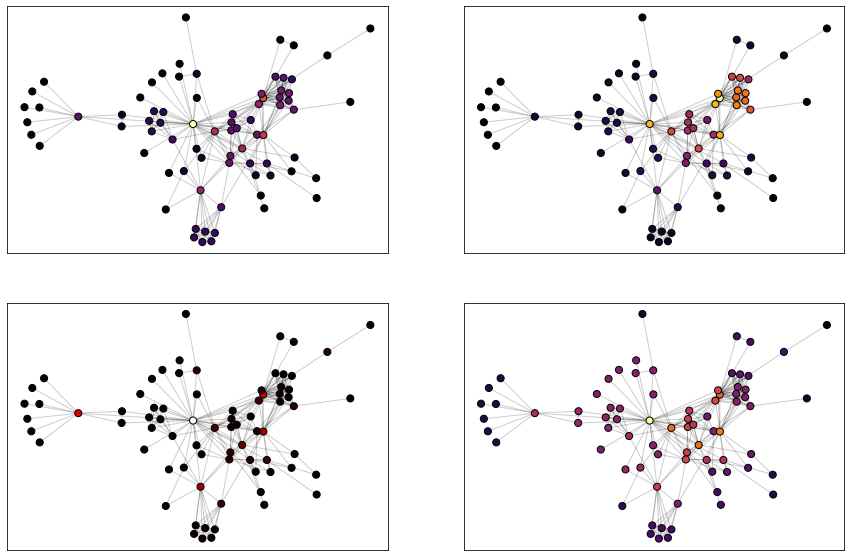

In [32]:
pos=nx.spring_layout(Lesmis)
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,10))
pos = nx.spring_layout(Lesmis)

centralities = [
    list(df["degree"]),
    list(df["eig_centrality"]),
    list(df["betweenness_centrality"]),
    list(df["closeness_centrality"])]

colors_centralities = [plt.cm.inferno,plt.cm.inferno,plt.cm.hot,plt.cm.inferno]

i = 0
for row in axes:
    for ax in row:
        es = nx.draw_networkx_edges(Lesmis, pos, alpha=0.2, ax=ax)
        ns = nx.draw_networkx_nodes(Lesmis, pos, edgecolors="k", nodelist=Lesmis.nodes(), node_color=centralities[i],
                                        node_size=50, cmap=colors_centralities[i], ax=ax)
        i+=1
        

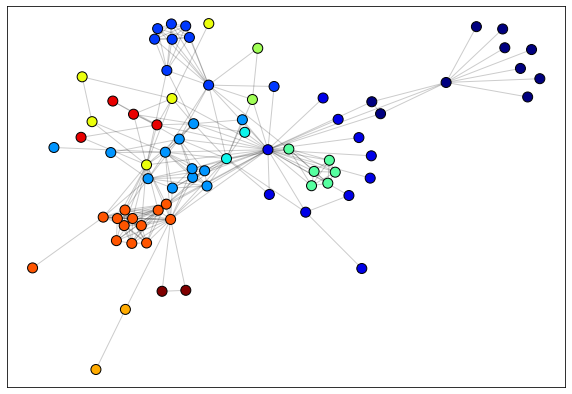

In [33]:
# Group
pos=nx.spring_layout(Lesmis)
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(10,7))
es = nx.draw_networkx_edges(Lesmis, pos, alpha=0.2, ax=axes)
ns = nx.draw_networkx_nodes(Lesmis, pos, edgecolors="k", nodelist=Lesmis.nodes(), node_color=df["group"],
                                        node_size=100, cmap=plt.cm.jet, ax=axes)
    

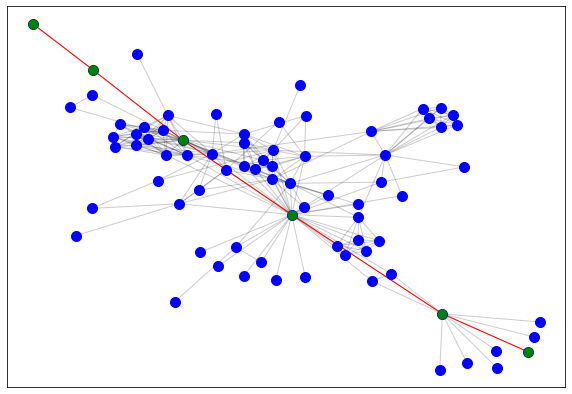

In [34]:
# Group
pos=nx.spring_layout(Lesmis)
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(10,7))
es = nx.draw_networkx_edges(Lesmis, pos, alpha=0.2, ax=axes)
es = nx.draw_networkx_edges(Lesmis, pos, edgelist=d_2["shortest_path"],edge_color="r", alpha=1, ax=axes)
ns = nx.draw_networkx_nodes(Lesmis, pos, nodelist=Lesmis.nodes(), node_color="b",
                                        node_size=100, cmap=plt.cm.jet, ax=axes)
ns = nx.draw_networkx_nodes(Lesmis, pos, nodelist=d_2["shortest_path_nodes"], node_color="g",
                                        node_size=80, cmap=plt.cm.jet, ax=axes)
    

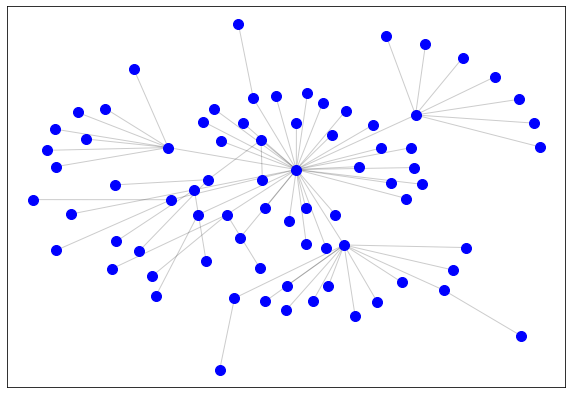

In [35]:
# Spanning Tree
pos=nx.kamada_kawai_layout(Lesmis)
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(10,7))
es = nx.draw_networkx_edges(Lesmis, pos, edgelist = d_2["spanning_tree"],alpha=0.2, ax=axes)
ns = nx.draw_networkx_nodes(Lesmis, pos, nodelist=Lesmis.nodes(), node_color="b",
                                        node_size=100, cmap=plt.cm.jet, ax=axes)
    

In [36]:
df.head()

,character,degree,info,group,eig_centrality,betweenness_centrality,closeness_centrality
0,Myriel,10,The Bishop of Digne (full name Charles-Franço...,0,0.028134,0.176842,0.429379
1,Napoleon,1,None,0,0.002343,0.000000,0.301587
2,MlleBaptistine,3,Bishop Myriel's sister. She loves and venerat...,0,0.026873,0.000000,0.413043
3,MmeMagloire,3,Domestic servant to Bishop Myriel and his sis...,0,0.026873,0.000000,0.413043
4,CountessDeLo,1,None,0,0.002343,0.000000,0.301587


In [38]:
d_2.keys()

dict_keys(['shortest_path_nodes', 'shortest_path', 'plot_summary', 'spanning_tree', 'description'])

In [48]:
import json
result = df.to_json(orient="records")

In [53]:
parsed = json.loads(result)
with open('lesmischars.json', 'w') as outfile:
    json.dump(result, outfile)